# CIFar10 데이터셋을 이용한 CNN 연습

In [1]:
## Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical #원핫인코딩
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import Model  #함수형 API 

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


# Simple CNN for Cifar10 Dataset

In [2]:
## Hyper Parameters
learning_rate = 0.001
training_epochs = 2 #20
batch_size = 100
n_class = 10

In [3]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [4]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]

170500096/170498071 [==============================] - 41s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
train_labels = to_categorical(train_labels, n_class)  #원핫인코딩
test_labels = to_categorical(test_labels, n_class)    
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
#dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
# for element in dataset:
#   print(element)

## 연습 1: 데이터셋 만들기

In [8]:
# tf.data.Dataset을 이용해 데이터셋을 만들어라.
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

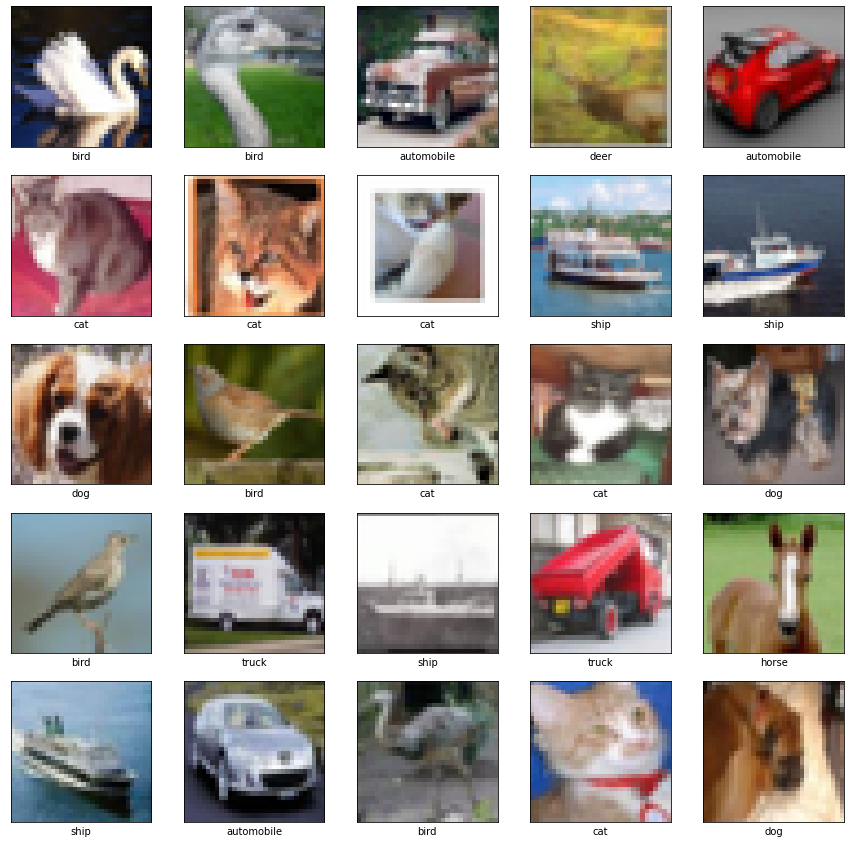

In [9]:
## Data 확인
plt.figure(figsize=(15,15))
for i in range(25):
    img_idx = np.random.randint(0, 49999)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_names[np.argmax(train_labels[img_idx])])

## 연습 2 CNN 기본 모델 만들기

In [21]:
## Model 만들기
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Concatenate

# 순차형 API를 사용해 위의 모델을 구축하라.
# 힌트:
# Conv2D -> MaxPool2D를 세번 반복하고, Fatten -> Dense -> Dropout -> Dense로 완성하라. 
# kersnel_size는 3, activation='relu', padding='SAMME', filter는 32, 64, 128 사용하고, Dense에서는 출력 유닛을 256, 10을 사용하라.

#############################################################
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

## 연습 3

In [22]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
             loss='categorical_crossentropy',   #원핫인코딩  cf. 정수형인코딩: sparse_categorical_crossentropy
             metrics=['accuracy'])

In [23]:
## Training
steps_per_epoch = n_train//batch_size
validation_steps = n_test//batch_size

## 연습 4

In [24]:
## 학습
# 힌트 훈련셋, 에폭, 배치크기, 검증셋을 지정하라.
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch,
                   validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/2
500/500 [==============================] - 100s 195ms/step - loss: 1.8387 - accuracy: 0.3164 - val_loss: 1.2368 - val_accuracy: 0.5573
Epoch 2/2
500/500 [==============================] - 97s 192ms/step - loss: 1.2156 - accuracy: 0.5671 - val_loss: 1.0146 - val_accuracy: 0.6317


# 학습 결과 확인

In [25]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

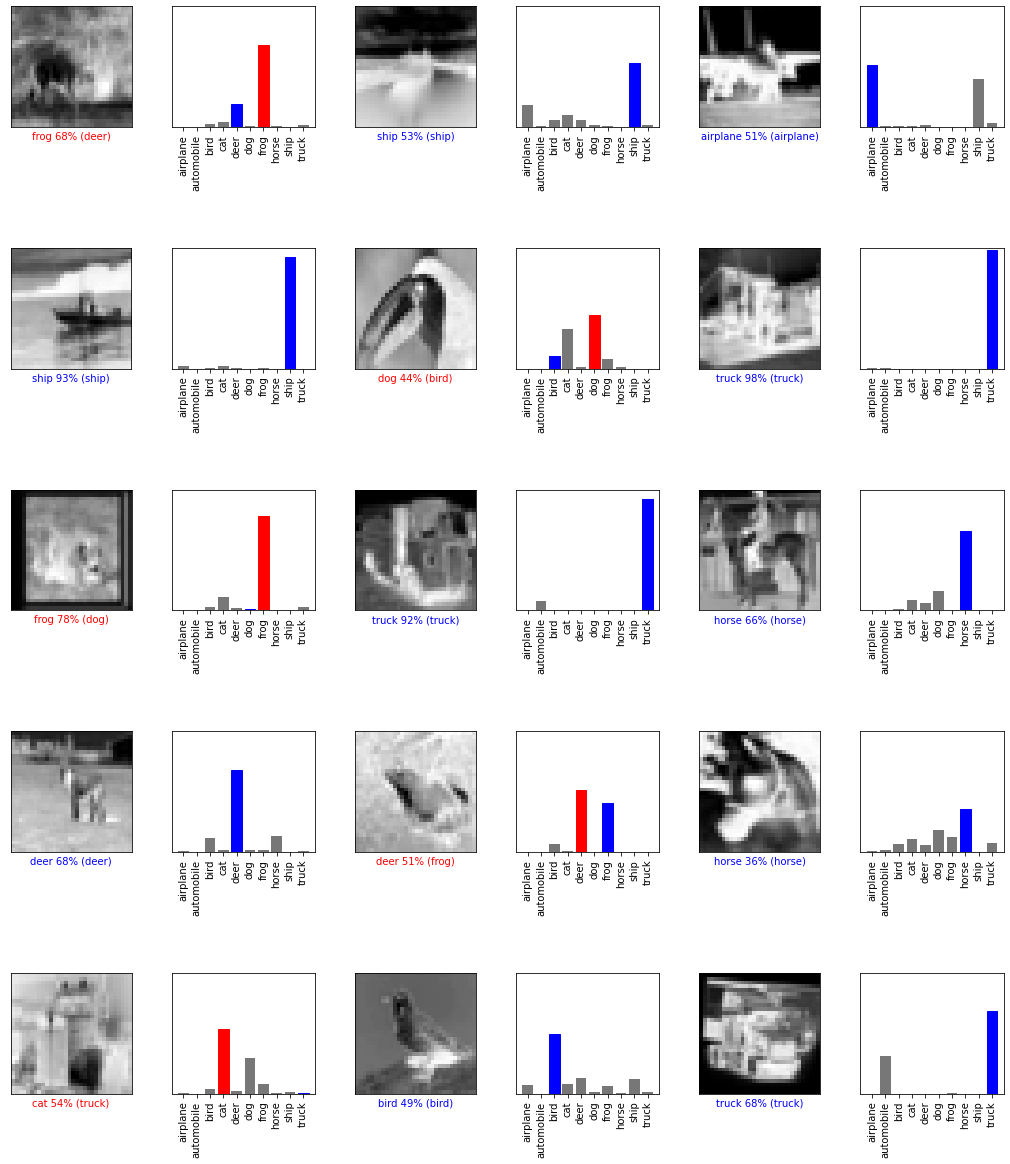

In [26]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

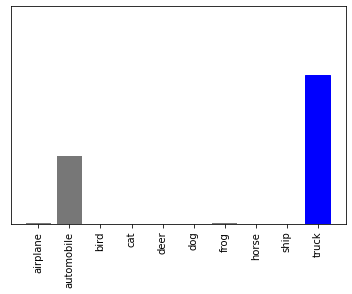

In [27]:
plot_value_array(i, predictions.numpy(), labels.numpy())        

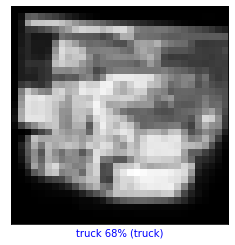

In [28]:
plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())

# 필터와 특성맵의 시각화 (합성곱 CNN의 내부를 살펴보자)
1. 필터
2. 특성맵

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [30]:
for layer in model.layers:
    # 합성곱층을 찾아보자
    if 'conv' not in layer.name:
        continue
    # 필터 가중치를 얻는다.
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_3 (3, 3, 3, 32)
conv2d_4 (3, 3, 32, 64)
conv2d_5 (3, 3, 64, 128)


In [31]:
# 모델의 필터를 이해하자. 
# 최초의 은닉층의 필터를 찾아보자.
layer = model.layers #Conv layers at 0, 2, 4, 7, 9
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv2d_3 (3, 3, 3, 32)


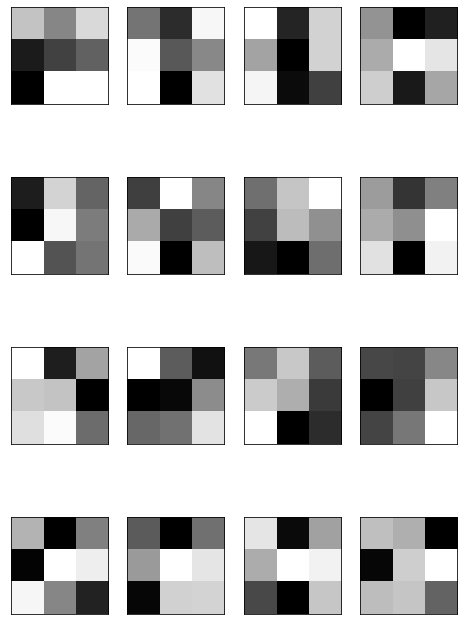

In [32]:
# 첫번째 은닉층의 필터를 그린다,
fig1=plt.figure(figsize=(8, 12))
columns = 4
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

#### 이제 특성맵을 그려보자

In [33]:
# 다시 모델 구조를 확인한다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [34]:
outputs = [model.layers[i].output for i in conv_layer_index]
outputs

NameError: name 'conv_layer_index' is not defined

In [ ]:
# 합성곱만을 포함하는 소형 모델을 구축한다.
#conv_layer_index = [0, 2, 4, 7, 9]
conv_layer_index = [0, 2, 4]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

In [ ]:
#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#img = load_img(train_images[img_idx], target_size=(32, 32)) #VGG user 224 as input
#img = load_img(train_images[0]) #VGG user 224 as input
# convert the image to an array
#img = img_to_array(img)

In [ ]:
train_images[0].shape

In [ ]:
img=train_images[1]
plt.imshow(img)

In [ ]:
# 모델 입력 차원과 일치시키기 위해 차원을 추가
img = np.expand_dims(img, axis=0)

In [ ]:
# 입력 이미지로 특성맵 생성
feature_output = model_short.predict(img)

In [58]:
# 생성된 특성 맵 차원 검사
for ftr in feature_output:
    print(ftr.shape)

(1, 32, 32, 32)
(1, 16, 16, 64)
(1, 8, 8, 128)


(1, 32, 32, 32)


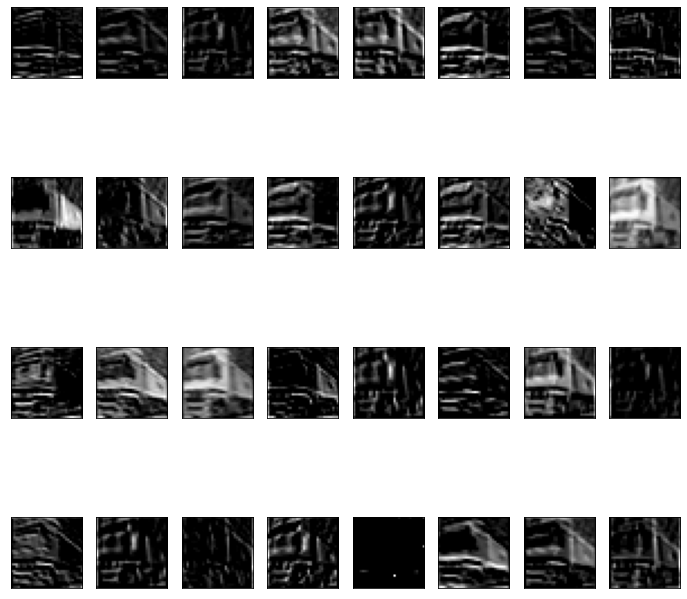

(1, 16, 16, 64)


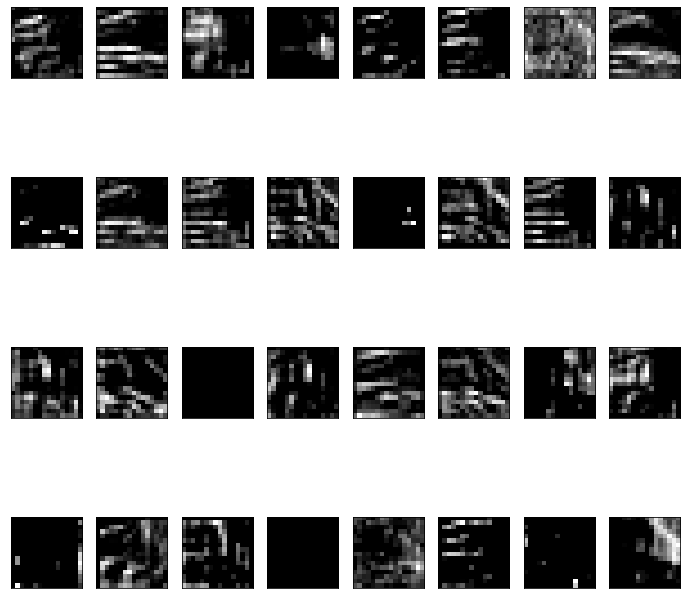

(1, 8, 8, 128)


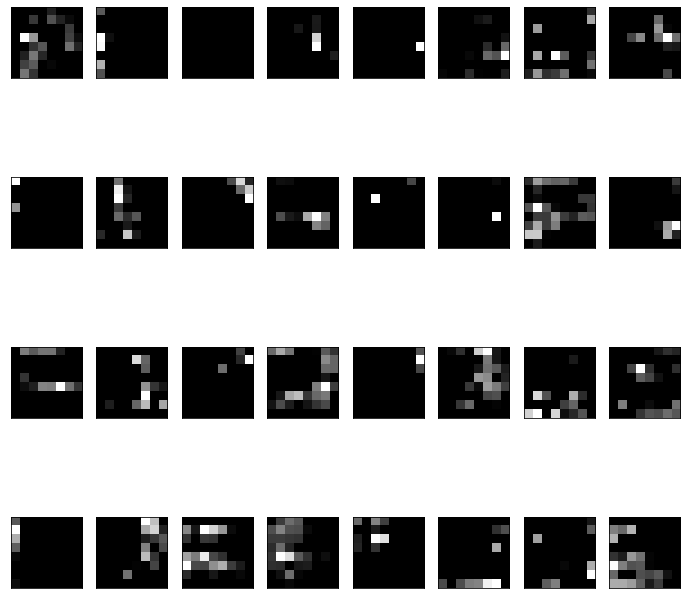

In [59]:
columns = 8
rows = 4
for ftr in feature_output:
    print(ftr.shape)
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  # 측 표시를 지운다.
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()